# Chapter 13 : 푸리에 급수로 음파 분석하기

In [76]:
import matplotlib.pyplot as plt
import numpy as np 

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def plot_sequence(points,max=100,line=False,**kwargs):
    if line:
        plt.plot(range(0,max),points[0:max],**kwargs)
    else:
        plt.scatter(range(0,max),points[0:max],**kwargs)

## 13.1 음파를 결합하고 분해하기

## 13.2 파이썬으로 음파 재생하기

### 13.2.1 소리를 처음으로 만들어보기

In [77]:
import pygame, pygame.sndarray
pygame.mixer.init(frequency=44100, size=-16, channels=1)

In [78]:
import numpy as np
arr = np.random.randint(-32768, 32767, size=(44100,1))
arr

array([[ -8226],
       [-32688],
       [ 22490],
       ...,
       [-13039],
       [-28773],
       [ -7466]])

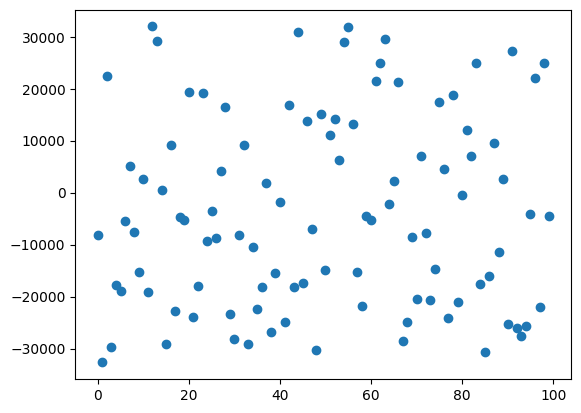

In [79]:
plot_sequence(arr)

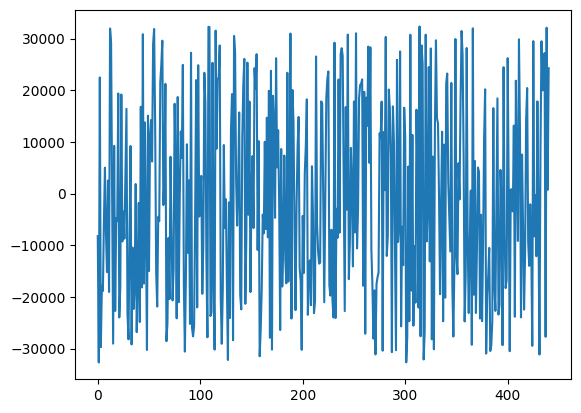

In [80]:
plot_sequence(arr,line=True,max=441)

In [81]:
arr = np.random.randint(-32768, 32767, size=44100)
arr = np.expand_dims(arr, axis=1)
arr = np.tile(arr, (1, 2))
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [82]:
arr = np.random.randint(-10000, 10000, size=(44100,2))
sound = pygame.sndarray.make_sound(arr)
sound.play()

### 13.2.2 음표 재생하기

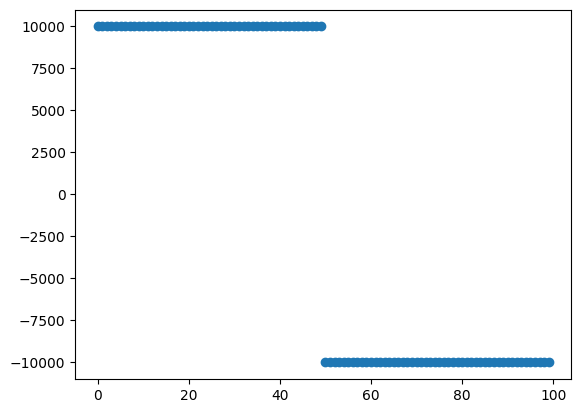

In [87]:
form = np.repeat([10000,-10000],50)
plot_sequence(form)

In [93]:
arr = np.tile(form,441)
arr = np.expand_dims(arr, axis=1)
arr = np.tile(arr, (1, 2))

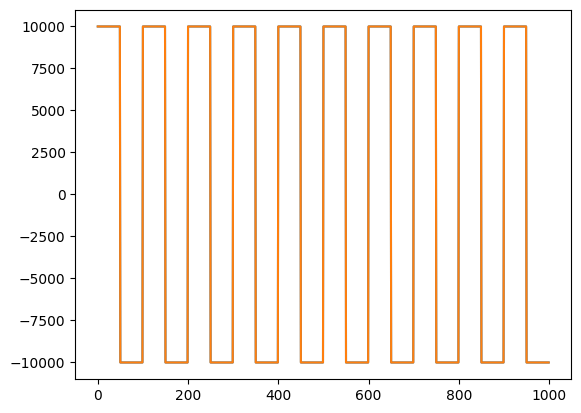

In [89]:
plot_sequence(arr,line=True,max=1000)

In [90]:
sound = pygame.sndarray.make_sound(arr)
sound.play()

### 13.2.3 연습문제

13.1 음 A는 1초에 441번 반복한다. 이번에는 1초 350번 반복하는 음 F(한국 음이름 '바')의 패턴을 생성하라.

In [94]:
form = np.repeat([10000,-10000],63)
arr = np.tile(form,350)
arr = np.expand_dims(arr, axis=1)
arr = np.tile(arr, (1, 2))
sound = pygame.sndarray.make_sound(arr)
sound.play()

## 13.3 정현파를 소리로 변환하기

### 13.3.1 정현 함수로 오디오 만들기

In [95]:
from math import sin,cos,pi

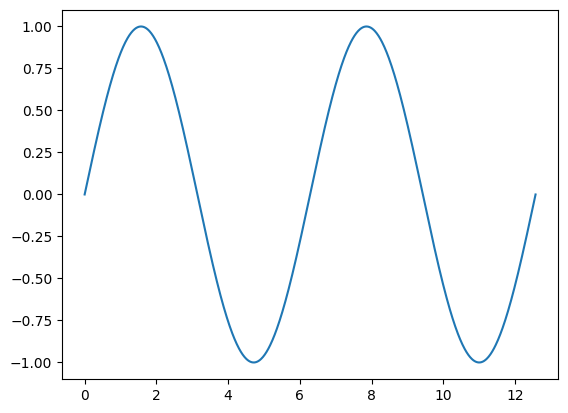

In [96]:
plot_function(sin,0,4*pi)

### 13.3.2 정현 함수의 주파수 구하기

In [97]:
def make_sinusoid(frequency,amplitude):
    def f(t): #<1>
        return amplitude * sin(2*pi*frequency*t) 
    return f

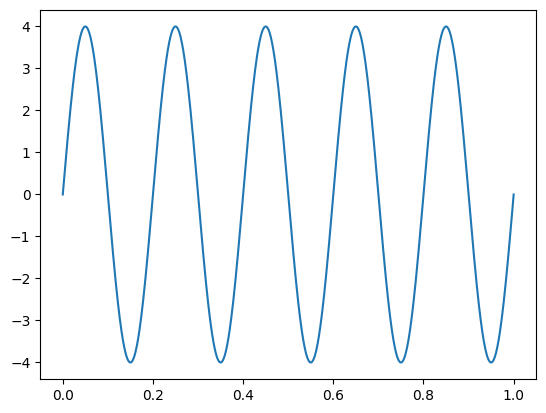

In [98]:
plot_function(make_sinusoid(5,4),0,1)

### 13.3.3 음파의 샘플링과 재생하기

In [99]:
sinusoid = make_sinusoid(441,8000)

In [100]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [101]:
np.arange(0,1,1/44100)

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       9.99931973e-01, 9.99954649e-01, 9.99977324e-01])

In [102]:
def sample(f,start,end,count): #<1>
    mapf = np.vectorize(f) #<2>
    ts = np.arange(start,end,(end-start)/count) #<3>
    values = mapf(ts) #<4>
    return values.astype(np.int16) #<5>

In [107]:
sinusoid = make_sinusoid(441,8000)
arr = sample(sinusoid, 0, 1, 44100)
arr = np.expand_dims(arr, axis=1)
arr = np.tile(arr, (1, 2))
sound = pygame.sndarray.make_sound(arr)
sound.play()

### 13.3.4 연습문제

13.2 탄젠트 함수 $\tan(t) = \sin(t)/\cos(t).$ 를 플로팅하라. 이 함수의 주기를 구하라.

주기 : $\pi$.

(-10.0, 10.0)

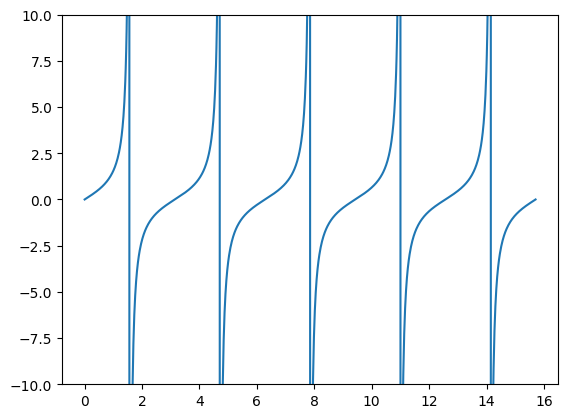

In [108]:
from math import tan
plot_function(tan,0,5*pi)
plt.ylim(-10,10)

13.4 주파수가 5인 cos(kt)에 대하여 k값을 구하라. 함수 cos(kt)를 0에서 1 범위에서 플로팅하고 이 그래프가 5번 반복됨을 보여라.

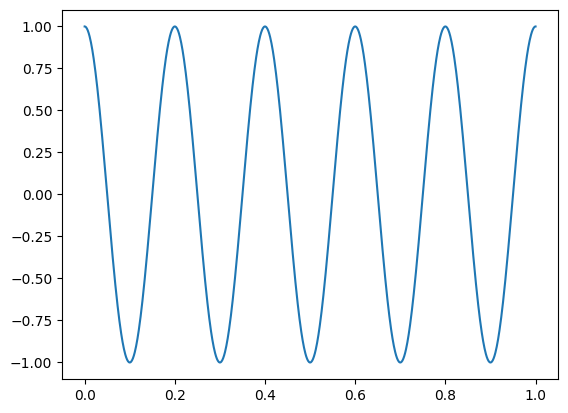

In [109]:
plot_function(lambda t: cos(10*pi*t),0,1)

## 13.4 음파를 결합해 새 음파 만들기

### 13.4.1 샘플링된 음파를 더해 화음 만들기

In [110]:
np.array([1,2,3]) + np.array([4,5,6])

array([5, 7, 9])

In [126]:
sample1 = sample(make_sinusoid(441,8000),0,1,44100)
sample2 = sample(make_sinusoid(551,8000),0,1,44100)
sample3 = np.expand_dims(sample1, axis=1)
sample3 = np.tile(sample3, (1, 2))
sample4 = np.expand_dims(sample2, axis=1)
sample4 = np.tile(sample4, (1, 2))

In [127]:
sound1 = pygame.sndarray.make_sound(sample3)
sound2 = pygame.sndarray.make_sound(sample4)
sound1.play()
sound2.play()

### 13.4.2 두 음파의 합 그리기

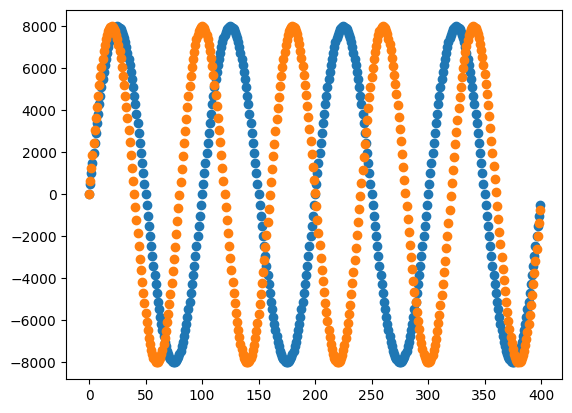

In [128]:
plot_sequence(sample1,max=400)
plot_sequence(sample2,max=400)

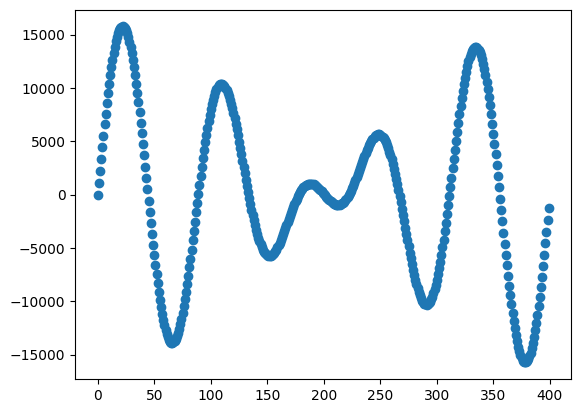

In [129]:
plot_sequence(sample1+sample2,max=400)

### 13.4.3 정현 함수의 일차결합 만들기

In [133]:
def const(n):
    return 1

def fourier_series(a0,a,b):
    def result(t):
        cos_terms = [an*cos(2*pi*(n+1)*t) for (n,an) in enumerate(a)] 
        sin_terms = [bn*sin(2*pi*(n+1)*t) for (n,bn) in enumerate(b)] 
        return a0*const(t) + sum(cos_terms) + sum(sin_terms) 
    return result

In [131]:
f = fourier_series(0,[0,0,0,0,0],[0,0,0,1,1])

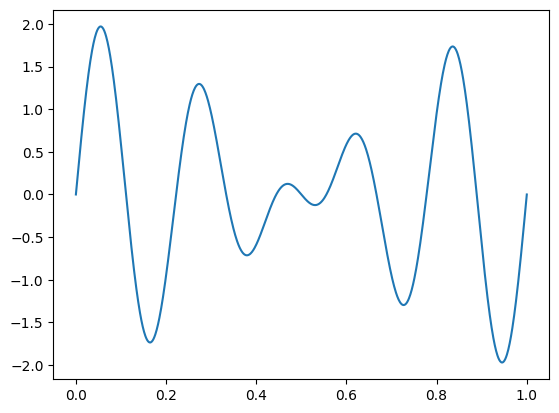

In [132]:
plot_function(f,0,1)

### 13.4.4 정현 함수로 익숙한 함수 만들기

In [134]:
f1 = fourier_series(0,[],[4/pi])

In [135]:
f3 = fourier_series(0,[],[4/pi,0,4/(3*pi)])

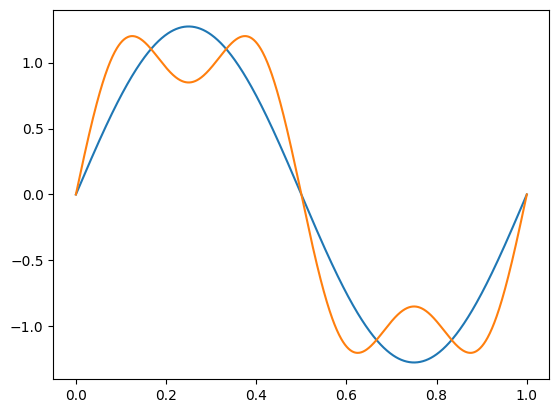

In [136]:
plot_function(f1,0,1)
plot_function(f3,0,1)

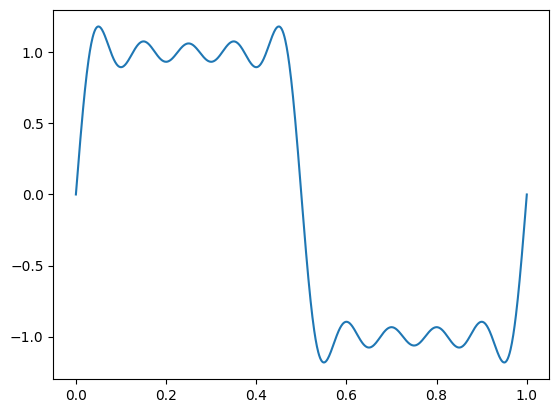

In [137]:
b = [4/(n * pi) if n%2 != 0 else 0 for n in range(1,10)] #<1>
f = fourier_series(0,[],b)
plot_function(f,0,1)

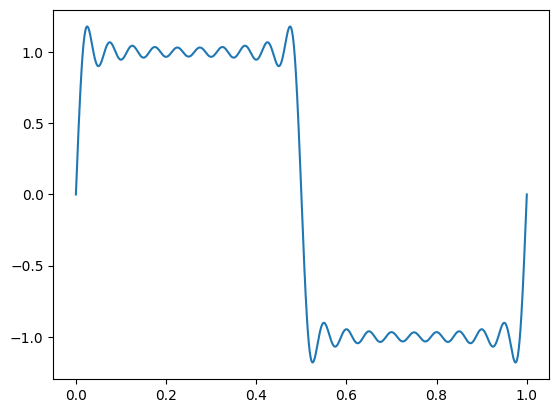

In [139]:
b = [4/(n * pi) if n%2 != 0 else 0 for n in range(1,20)]
f = fourier_series(0,[],b)
plot_function(f,0,1)

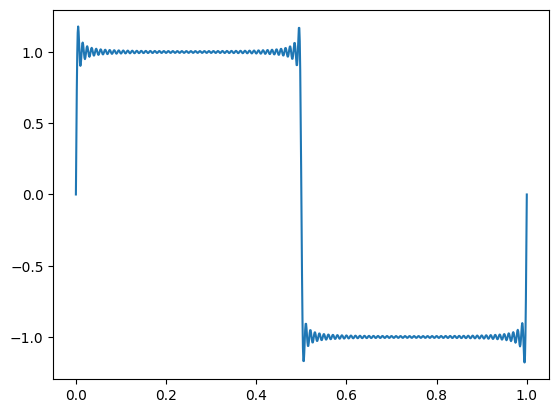

In [140]:
b = [4/(n * pi) if n%2 != 0 else 0 for n in range(1,100)]
f = fourier_series(0,[],b)
plot_function(f,0,1)

### 13.4.5 연습문제

13.5 앞의 사각파 푸리에 급수를 수정해서 주파수를 441Hz로 만들고, 이를 샘플링해 모양만 사각파가 아님을 확인해라. \
이 샘플링 결과는 사각파와 마찬가지의 소리를 내야 한다.

In [142]:
arr = sample(lambda t: 10000* f(441*t), 0, 1, 44100)
arr = np.expand_dims(arr, axis=1)
arr = np.tile(arr, (1, 2))
sound = pygame.sndarray.make_sound(arr)
sound.play()

## 13.5 음파를 푸리에 급수로 분해하기

### 13.5.1 내적으로 벡터 성분 찾기

### 13.5.2 주기함수의 내적 정의하기

In [144]:
def inner_product(f,g,N=1000):
    dt = 1/N 
    return 2*sum([f(t)*g(t)*dt for t in np.arange(0,1,dt)])

In [145]:
def s(n): 
    def f(t):
        return sin(2*pi*n*t)
    return f
def c(n): 
    def f(t):
        return cos(2*pi*n*t)
    return f

In [146]:
inner_product(s(1),c(1))

4.2197487366314734e-17

In [147]:
inner_product(s(1),s(2))

-1.4176155163484784e-18

In [148]:
inner_product(c(3),s(10))

-1.7092447249233977e-16

In [149]:
inner_product(s(1),s(1))

1.0000000000000002

In [150]:
inner_product(c(1),c(1))

0.9999999999999999

In [151]:
inner_product(c(3),c(3))

1.0

In [152]:
from math import sqrt

def const(n):
    return 1 /sqrt(2)

In [153]:
inner_product(const,s(1))

-2.2580204307905138e-17

In [154]:
inner_product(const,c(1))

-3.404394821604484e-17

In [155]:
inner_product(const,const)

1.0000000000000007

### 13.5.3 푸리에 계수를 찾는 함수 작성하기

In [156]:
def fourier_series(a0,a,b):
    def result(t):
        cos_terms = [an*cos(2*pi*(n+1)*t) for (n,an) in enumerate(a)] 
        sin_terms = [bn*sin(2*pi*(n+1)*t) for (n,bn) in enumerate(b)] 
        return a0*const(t) + sum(cos_terms) + sum(sin_terms) 
    return result

In [157]:
def fourier_coefficients(f,N):
    a0 = inner_product(f,const) 
    an = [inner_product(f,c(n)) for n in range(1,N+1)] 
    bn = [inner_product(f,s(n)) for n in range(1,N+1)] 
    return a0, an, bn

In [158]:
f = fourier_series(0,[2,3,4],[5,6,7])

In [159]:
fourier_coefficients(f,3)

(-3.812922200197022e-15,
 [1.9999999999999887, 2.999999999999999, 4.0],
 [5.000000000000002, 6.000000000000001, 7.0000000000000036])

### 13.5.4 사각파의 푸리에 계수 구하기

In [160]:
def square(t):
    return 1 if (t%1) < 0.5 else -1

In [161]:
a0, a, b = fourier_coefficients(square,10)

In [162]:
b[0], 4/pi

(1.273235355942202, 1.2732395447351628)

In [163]:
b[2], 4/(3*pi)

(0.4244006151333577, 0.4244131815783876)

In [164]:
b[4], 4/(5*pi)

(0.2546269646514865, 0.25464790894703254)

### 13.5.5 다른 파형의 푸리에 계수 구하기

In [165]:
def sawtooth(t):
    return t%1

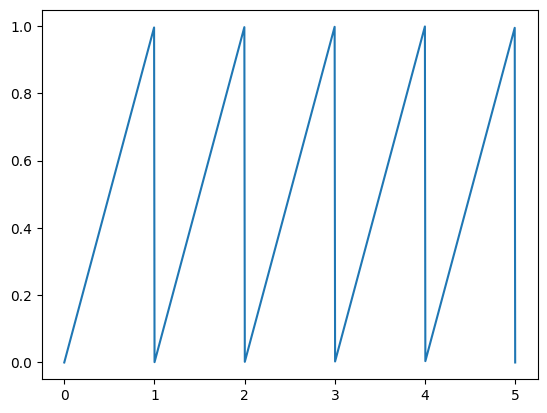

In [166]:
plot_function(sawtooth,0,5)

In [167]:
approx = fourier_series(*fourier_coefficients(sawtooth,10))

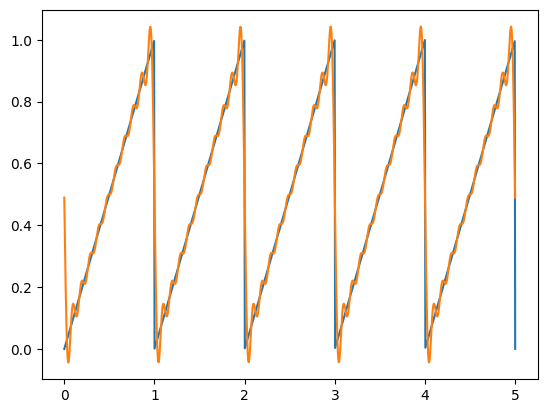

In [168]:
plot_function(sawtooth,0,5)
plot_function(approx,0,5)

In [169]:
def speedbumps(t):
    if abs(t%1 - 0.5) > 0.25:
        return 0
    else:
        return sqrt(0.25*0.25 - (t%1 - 0.5)**2)

In [170]:
approx = fourier_series(*fourier_coefficients(speedbumps,10))

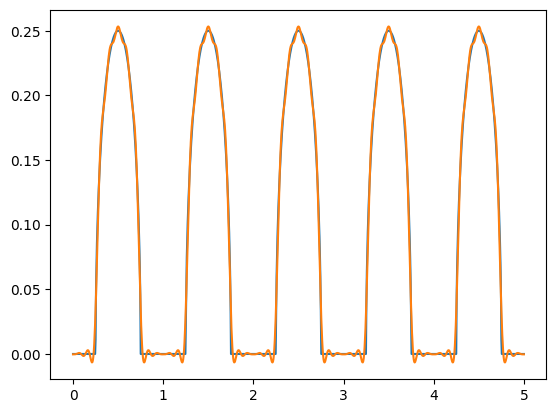

In [171]:
plot_function(speedbumps,0,5)
plot_function(approx,0,5)

### 13.5.6 연습문제

13.9 주파수가 441Hz인 톱니파를 재생해 본 뒤 그 주파수에서 연주한 사각파 및 사인파 파동과 비교하라.

In [174]:
def modified_sawtooth(t):
    return 8000 * sawtooth(441*t)
arr = sample(modified_sawtooth,0,1,44100)
arr = np.expand_dims(arr, axis=1)
arr = np.tile(arr, (1, 2))
sound = pygame.sndarray.make_sound(arr)
sound.play()